# Clasificación de Imágenes utilizando Redes Neuronales Convolucionales

In [ ]:
# Clasificación de imágenes uitilizando redes neuronales convolucionales.
# Librerías Necesarias
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import math

In [ ]:
# Recibir los pixeles y extraer las características y clasificar con capas regulares
# Cargar los datos de MNIST
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

## Entrenamiento utilizando los datos de MNIST 

MNIST cuenta con imágenes de 28x28 píxeles en blanco y negro de números siendo  70 000 imágenes pre-etiquetadas para la clasificación

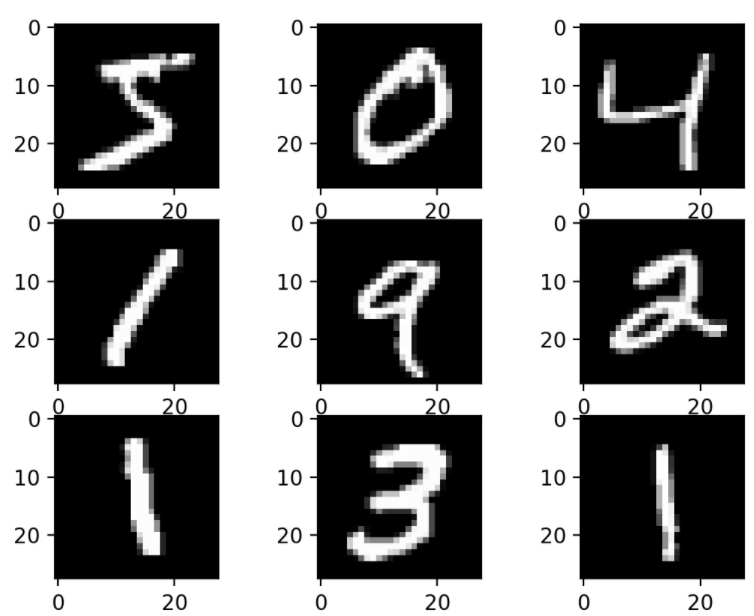


In [ ]:
# Parámetros de los Datos
PIXEL_SIZE = 255
filas = 2
columnas = 8
MATRIX_SIZE = filas * columnas
BATCH_SIZE = 32
NUM_EPOCHS = 100
TRAIN_SIZE = 60000
TEST_SIZE = 10000

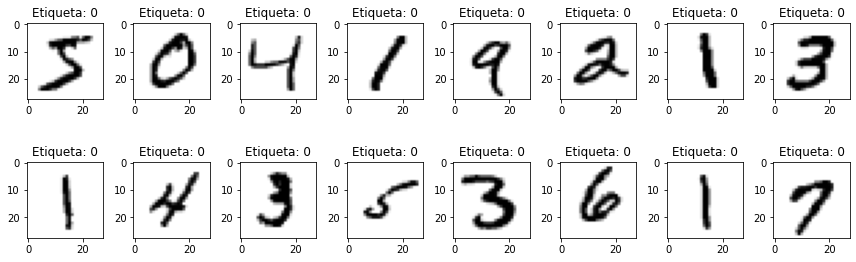

In [ ]:
# Mostrar Imágenes
def print_images():
  imgs = X_train[0:MATRIX_SIZE]
  etiqs = Y_train[0:MATRIX_SIZE]
  fig, axis = plt.subplots(filas, columnas, figsize=(1.5 * columnas, 2 * filas))
  for i in range(MATRIX_SIZE):
    print = axis[i//columnas, i%columnas]
    print.imshow(imgs[i].reshape(28,28), cmap='gray_r')
    print.set_title('Etiqueta: {}'.format(np.argmax(etiqs[i])))
  plt.tight_layout()
  plt.show()

print_images()

In [ ]:
# Reshape del X_train y x_test correcta (1, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Configuración de Y_train y y_test como matrices
Y_train = to_categorical(Y_train)
y_test = to_categorical(y_test)

In [ ]:
# Normalización de los datos para obtener mejores resultados
X_train = X_train.astype('float32') / PIXEL_SIZE
x_test = x_test.astype('float32') / PIXEL_SIZE

# Data Augmentation utilizando ImageDataGenerator

In [ ]:
# Configuración para mi Data Augmentation utilizando ImageDataGenerator de Keras
rango_rotacion = 30
rango_ancho = 0.25
rango_alto = 0.25
rango_inclinacion = 15
rango_brillo = (50, 1)
rango_acercamiento=[0.5,1.5]
rango_alejamentos=[1.5,0.5]

In [ ]:
# Configuración de la clase ImageDataGenerator para realizar la Data Augmentation
datagen =ImageDataGenerator(
    rotation_range=rango_rotacion,
    width_shift_range=rango_ancho,
    height_shift_range=rango_alto,
    brightness_range=rango_brillo,
    shear_range=rango_inclinacion,
    zoom_range=rango_acercamiento
)

In [ ]:
# Función fit de los datos de entrenamiento de ImageDataGenerator
datagen.fit(X_train)
datagen

## Definición del Modelo Deep Learning Convolutional Neural Network

In [ ]:
# Definición del Modelo
modelo = tf.keras.models.Sequential([
                                     # Capa de Convolución de 32 filtros
                                     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), 
                                     # Capa de agrupación máxima
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # Capa de Convolución de 64 filtros porque aumentará el tamaño de filtros
                                     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                     # Capa de agrupación máxima
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # Capa para hacer dropout para aumentar la velocidad y reducir la cantidad de info que no proporcione información relevante           
                                     tf.keras.layers.Dropout(0.5),
                                     # Capa para vectorizar todo dentro de un vector simple
                                     tf.keras.layers.Flatten(),
                                     # Capa densa oculta para agrupación
                                     tf.keras.layers.Dense(100, activation='relu'),
                                     # Capa densa de salida(0-9) para mostrar el resultado
                                     tf.keras.layers.Dense(10, activation="softmax")
                                     ])
modelo

In [ ]:
# Definición del optimizador, función de pérdida y la métrica
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
# Asignación de las variables de entrenamiento a nuestro Data_Gen
data_gen_entrenamiento = datagen.flow(X_train, Y_train, batch_size=32)
data_gen_entrenamiento 

In [ ]:
# Entrenamiento del Modelo
print("ENTRENANDO EL MODELO...")
training = modelo.fit(
    data_gen_entrenamiento,
    epochs = NUM_EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data=(x_test, y_test),
    steps_per_epoch=int(np.ceil(TRAIN_SIZE / float(BATCH_SIZE))),
    validation_steps=int(np.ceil(TEST_SIZE / float(BATCH_SIZE)))
)
print("MODELO ENTRENADO CON ÉXITO!")

ENTRENANDO EL MODELO...
Epoch 1/100
1875/1875 [==============================] - 77s 41ms/step - loss: 2.2703 - accuracy: 0.2571 - val_loss: 2.3435 - val_accuracy: 0.1135
Epoch 2/100
1875/1875 [==============================] - 75s 40ms/step - loss: 1.3888 - accuracy: 0.5264 - val_loss: 3.8923 - val_accuracy: 0.1135
Epoch 3/100
1875/1875 [==============================] - 75s 40ms/step - loss: 1.1116 - accuracy: 0.6350 - val_loss: 5.7999 - val_accuracy: 0.1135
Epoch 4/100
1875/1875 [==============================] - 75s 40ms/step - loss: 0.9771 - accuracy: 0.6812 - val_loss: 6.5573 - val_accuracy: 0.1135
Epoch 5/100
1875/1875 [==============================] - 75s 40ms/step - loss: 0.9095 - accuracy: 0.7053 - val_loss: 6.6985 - val_accuracy: 0.1135
Epoch 6/100
1875/1875 [==============================] - 75s 40ms/step - loss: 0.8528 - accuracy: 0.7235 - val_loss: 7.1504 - val_accuracy: 0.1135
Epoch 7/100
1875/1875 [==============================] - 75s 40ms/step - loss: 0.8171 - accura

In [ ]:
!pip install tensorflowjs

/bin/bash: mkir: command not found


In [ ]:
!mkdir resultados

In [ ]:
# Exportar el modelo
modelo.save('cnn_model_conv_da_d_100_epoch.h5')
!tensorflowjs_converter --input_format keras cnn_model_conv_da_d_100_epoch.h5 resultados

In [ ]:
!ls -ls 

total 2164
2156 -rw-r--r-- 1 root root 2206216 Dec  7 02:02 cnn_model_conv_da_d_100_epoch.h5
   4 drwxr-xr-x 2 root root    4096 Dec  7 02:02 resultados
   4 drwxr-xr-x 1 root root    4096 Dec  3 14:33 sample_data


## Predicción de datos ingresados

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import cv2

def prediccion(file):
  #image = load_img(file, target_size=(28,28))
  image =  img_to_array(file)
  image = np.expand_dims(image,axis=0)
  array = modelo.predict(image)
  result = array[0]
  option = np.argmax(result)
  print("Esa imagen es el numero: ", option)
  return option

In [ ]:
rate = 0
for i in range(9):
  print("Imagen: ", i+1)
  ruta = str(i+1) + ".png"
  image = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
  pred = prediccion(image)
  if(i+1) == pred:
    rate = rate + 1
  print(pred)
print("El porcentaje el modelo con las imagenes de prueba es del", rate*10,"%")

Imagen:  1
Esa imagen es el numero:  2
2
Imagen:  2
Esa imagen es el numero:  2
2
Imagen:  3
Esa imagen es el numero:  3
3
Imagen:  4
Esa imagen es el numero:  4
4
Imagen:  5
Esa imagen es el numero:  5
5
Imagen:  6
Esa imagen es el numero:  5
5
Imagen:  7
Esa imagen es el numero:  7
7
Imagen:  8
Esa imagen es el numero:  8
8
Imagen:  9
Esa imagen es el numero:  9
9
El porcentaje el modelo con las imagenes de prueba es del 70 %
